# Dissertation Code_Classification
Student ID: 20455974
Final Dissertation

University of Nottingham

MSc Financial Technology

# Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings("ignore")

## Import data

The data was downloaded from Bloomberg on:
* Exchange rate of Vietnam with its major trading partners: the China and the US
* Precious metal spot price and future price: Gold, Silver, Palladium, Platinum
* Global Stock Indices: Hang Seng Index, Nasdaq 100, Nasdaq Composite, Nikkei 225, SP500, DOJI, Shanghai Shenzhen CSI3000, Shanghai Shenzhen Composite and Singapore Stock Index
* Volatility stock index: VIX Index

In [2]:
com_data = ['Com_Fut_Gold.csv', # Index 0
            'Com_Fut_Palladium.csv', # Index 1
            'Com_Fut_Platinum.csv', # Index 2
            'Com_Fut_Silver.csv', # Index 3
            'Com_Spot_Brent.csv', # Index 4
            'Com_Spot_GoldPrice.csv', # Index 5
            'Com_Spot_Palladium.csv', # Index 6
            'Com_Spot_Platinum.csv', # Index 7
            'Com_Spot_Silver.csv', # Index 8
            'Com_Spot_WTI.csv'] # Index 9

xrate_data = ['Xrate_CNYVND.csv', # Index 0
              'Xrate_USDVND.csv'] # Index 1

indices_data = ['Index_DJI.csv', # Index 0
                'Index_HSI.csv', # Index 1
                'Index_Nasdaq100.csv', # Index 2
                'Index_NasdaqComposite.csv', # Index 3
                'Index_NKK225.csv', # Index 4
                'Index_SHSZ_CSI300.csv', # Index 5
                'Index_SICOM.csv', # Index 6
                'Index_SP500.csv', # Index 7
                'Index_SSEComp.csv', # Index 8
                'Index_STI.csv', # Index 9
                'Index_VIX.csv', # Index 10
                'Index_VNI.csv'] # Index 11
 
com_dfs = [pd.read_csv(file, parse_dates= ['Date'], index_col= ['Date'], date_format= "%m/%d/%Y") for file in com_data]
xrate_dfs = [pd.read_csv(file, parse_dates= ['Date'], index_col= ['Date'], date_format= "%m/%d/%Y") for file in xrate_data]
indices_dfs = [pd.read_csv(file, parse_dates= ['Date'], index_col= ['Date'], date_format= "%m/%d/%Y") for file in indices_data]

# Data Cleaning

## Check for total datapoints

In [3]:
# Check for total datapoints in dataframes commodity
for i in range(len(com_dfs)):
    print(com_data[i], ' ', len(com_dfs[i]))

Com_Fut_Gold.csv   4697
Com_Fut_Palladium.csv   4694
Com_Fut_Platinum.csv   4695
Com_Fut_Silver.csv   4695
Com_Spot_Brent.csv   5184
Com_Spot_GoldPrice.csv   5239
Com_Spot_Palladium.csv   5236
Com_Spot_Platinum.csv   5239
Com_Spot_Silver.csv   5242
Com_Spot_WTI.csv   5066


In [4]:
# Check for total datapoints in dfs Xrate
for i in range(len(xrate_dfs)):
    print(xrate_data[i], ' ', len(xrate_dfs[i]))

Xrate_CNYVND.csv   5216
Xrate_USDVND.csv   5113


In [5]:
# Check for total datapoints in dfs indices
for i in range(len(indices_dfs)):
    print(indices_data[i], ' ', len(indices_dfs[i]))

Index_DJI.csv   5064
Index_HSI.csv   4963
Index_Nasdaq100.csv   5064
Index_NasdaqComposite.csv   5064
Index_NKK225.csv   4928
Index_SHSZ_CSI300.csv   5113
Index_SICOM.csv   4527
Index_SP500.csv   4043
Index_SSEComp.csv   4892
Index_STI.csv   5054
Index_VIX.csv   4699
Index_VNI.csv   4996


## Balance the data

Since the datapoints are not equal, hence we will move the starting point to later time rather than 2003. We will set the starting date to 2008, the year before the Global Financial Crisis happen.

Before doing that, I have to turn all Date into datetime format. Since the data is download on BTS (British Summer Timezone), so we need to modify the date time correctly.

In [6]:
# Turn datetime in Commodity
for df in com_dfs:
    df.asfreq('B')
    
# Turn datetime in Exchange rate
for df in xrate_dfs:
    df.asfreq('B')

# Turn datetime in Indices
for df in indices_dfs:
    df.asfreq('B')

We will merge all the data together into one big data frame for easy doing EDA and examing the missing values.

In [7]:
# Get the name for all variables
com_name = [string[:-4] for string in com_data]
indices_name = [string[:-4] for string in indices_data]
xrate_name = [string[:-4] for string in xrate_data]

In [8]:
## Separate out all the individual data frames

# For commodity data
com_fut_gold = com_dfs[0]
com_fut_palladium = com_dfs[1]
com_fut_platinum = com_dfs[2]
com_fut_silver = com_dfs[3]
com_spot_brent = com_dfs[4]
com_spot_gold = com_dfs[5]
com_spot_palladium = com_dfs[6]
com_spot_platinum = com_dfs[7]
com_spot_silver = com_dfs[8]
com_spot_wti = com_dfs[9]

# For exchange rate data
xrate_cny = xrate_dfs[0]
xrate_usd = xrate_dfs[1]

# For global stock indices data
index_dji = indices_dfs[0]
index_hsi = indices_dfs[1]
index_nasdaq100 = indices_dfs[2]
index_nasdaq_composite = indices_dfs[3]
index_nkk225 = indices_dfs[4]
index_shsz_csi300 = indices_dfs[5]
index_sicomp = indices_dfs[6]
index_sp500 = indices_dfs[7]
index_ssecomp = indices_dfs[8]
index_sti = indices_dfs[9]
index_vix = indices_dfs[10]
index_vni = indices_dfs[11]


We need only the Last Price (Closing price) columns, so we modify the dataframe to take only that columns

In [9]:
# For commodity data
com_fut_gold = com_fut_gold.iloc[:,:1]
com_fut_palladium = com_fut_palladium.iloc[:,:1]
com_fut_platinum = com_fut_platinum.iloc[:,:1]
com_fut_silver = com_fut_silver.iloc[:,:1]
com_spot_brent = com_spot_brent.iloc[:,:1]
com_spot_gold = com_spot_gold.iloc[:,:1]
com_spot_palladium = com_spot_palladium.iloc[:,:1]
com_spot_platinum = com_spot_platinum.iloc[:,:1]
com_spot_silver = com_spot_silver.iloc[:,:1]
com_spot_wti = com_spot_wti.iloc[:,:1]

# For exchange rate data
xrate_cny = xrate_cny.iloc[:,:1]
xrate_usd = xrate_usd.iloc[:,:1]

# For global stock indices data
index_dji = index_dji.iloc[:,:1]
index_hsi = index_hsi.iloc[:,:1]
index_nasdaq100 = index_nasdaq100.iloc[:,:1]
index_nasdaq_composite = index_nasdaq_composite.iloc[:,:1]
index_nkk225 = index_nkk225.iloc[:,:1]
index_shsz_csi300 = index_shsz_csi300.iloc[:,:1]
index_sicomp = index_sicomp.iloc[:,:1]
index_sp500 = index_sp500.iloc[:,:1]
index_ssecomp = index_ssecomp.iloc[:,:1]
index_sti = index_sti.iloc[:,:1]
index_vix = index_vix.iloc[:,:1]
index_vni = index_vni.iloc[:,:1]

In [10]:
# Rename commodity data frame
com_fut_gold.rename(columns={'Last Price':'fut_gold'}, inplace= True)
com_fut_palladium.rename(columns={'Last Price':'fut_palladium'}, inplace= True)
com_fut_platinum.rename(columns={'Last Price':'fut_platinum'}, inplace= True)
com_fut_silver.rename(columns={'Last Price':'fut_silver'}, inplace= True)
com_spot_brent.rename(columns={'Last Price':'spot_brent'}, inplace= True)
com_spot_gold.rename(columns={'Last Price':'spot_gold'}, inplace= True)
com_spot_palladium.rename(columns={'Last Price':'spot_palladium'}, inplace= True)
com_spot_platinum.rename(columns={'Last Price':'spot_platinum'}, inplace= True)
com_spot_silver.rename(columns={'Last Price':'spot_silver'}, inplace= True)
com_spot_wti.rename(columns={'Last Price':'spot_wti'}, inplace= True)



# Rename exchange rate data frame
xrate_cny.rename(columns={'Last Price':'xrate_cny'}, inplace= True)
xrate_usd.rename(columns={'Last Price':'xrate_usd'}, inplace= True)

# Rename global stock indices rate data frame
index_dji.rename(columns={'Last Price':'index_dji'}, inplace= True)
index_hsi.rename(columns={'Last Price':'index_hsi'}, inplace= True)
index_nasdaq100.rename(columns={'Last Price':'index_nasdaq100'}, inplace= True)
index_nasdaq_composite.rename(columns={'Last Price':'index_nasdaq_comp'}, inplace= True)
index_nkk225.rename(columns={'Last Price':'index_nkk255'}, inplace= True)
index_shsz_csi300.rename(columns={'Last Price':'index_shsz_csi300'}, inplace= True)
index_sicomp.rename(columns={'Last Price':'index_sicomp'}, inplace= True)
index_sp500.rename(columns={'Last Price':'index_sp500'}, inplace= True)
index_ssecomp.rename(columns={'Last Price':'index_ssecomp'}, inplace= True)
index_sti.rename(columns={'Last Price':'index_sti'}, inplace= True)
index_vix.rename(columns={'Last Price':'index_vix'}, inplace= True)
index_vni.rename(columns={'Last Price':'index_vni'}, inplace= True)

Now we will join all the variables together

## Merging data together

In [11]:
# Create a merge list
merge_list = [com_fut_gold, com_fut_palladium, com_fut_platinum,
              com_spot_brent, com_spot_gold, com_spot_palladium, com_spot_platinum, com_spot_silver, com_spot_wti, xrate_cny, xrate_usd,
              index_dji, index_hsi, index_nasdaq100, index_nasdaq_composite, index_nkk225, index_shsz_csi300,
              index_sicomp, index_sp500, index_ssecomp, index_sti, index_vix,
              index_vni]

To ensure that we merge the dataframes without missing any date in any of the dataframe due to duplicate and missing dates in frame, we will create an uniform data frame with full date from July 2007 to 30th of June 2023

Most of the dataset start from 2003. However, the Shanghai Shenzhen CSI300 only started at 2007. Therefore, we will set the start date to merge for all dataframe to 2007-06-11

Now we will append all data in the merge list to this empty data frame to make our merging process complete

In [12]:
# Merging all df in merge_list
raw_data = merge_list[0]
for df in merge_list[1:]:
    raw_data = pd.concat([raw_data, df], axis = 1)

In [13]:
# Check the dataframe
raw_data

,fut_gold,fut_palladium,fut_platinum,spot_brent,spot_gold,spot_palladium,spot_platinum,spot_silver,spot_wti,xrate_cny,...,index_nasdaq100,index_nasdaq_comp,index_nkk255,index_shsz_csi300,index_sicomp,index_sp500,index_ssecomp,index_sti,index_vix,index_vni
Date,,,,,,,,,,,,,,,,,,,,,
2003-06-10,NaN,NaN,NaN,28.08,352.15,176.5,655.5,4.47,31.73,NaN,...,1212.99,1627.67,8789.09,NaN,NaN,NaN,1538.762,1419.05,NaN,152.23
2003-06-11,NaN,NaN,NaN,28.39,355.65,175.5,652.5,4.50,32.36,NaN,...,1228.24,1646.02,8890.30,NaN,NaN,NaN,1565.840,1427.73,NaN,152.25
2003-06-12,NaN,NaN,NaN,27.83,353.45,181.5,652.5,4.51,31.51,NaN,...,1229.32,1653.62,8918.60,NaN,NaN,NaN,1562.106,1462.28,NaN,152.40
2003-06-13,NaN,NaN,NaN,27.46,356.65,187.0,666.0,4.58,30.65,NaN,...,1203.91,1626.49,8980.64,NaN,NaN,NaN,1566.766,1464.24,NaN,152.20
2003-06-16,NaN,NaN,NaN,26.65,359.15,184.5,669.5,4.61,31.18,NaN,...,1241.58,1666.58,8839.83,NaN,NaN,NaN,1559.705,1449.62,NaN,151.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-25,1963.7,1281.2,967.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,11021.29,NaN,NaN,NaN,13.86,NaN
2023-07-26,1970.1,1255.9,964.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,10968.98,NaN,NaN,NaN,13.19,NaN
2023-07-27,1945.7,1236.6,937.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,10923.77,NaN,NaN,NaN,14.41,NaN


There is a lot of missing data observed from the dataframe examination due to different downloaded timeframe. We will reform the data to start from 2005 to June 30th 2023.

In [14]:
# Modify the time range of the data
from datetime import datetime
data = raw_data[datetime(2007,1,1) : datetime(2023,6,30)]
data

,fut_gold,fut_palladium,fut_platinum,spot_brent,spot_gold,spot_palladium,spot_platinum,spot_silver,spot_wti,xrate_cny,...,index_nasdaq100,index_nasdaq_comp,index_nkk255,index_shsz_csi300,index_sicomp,index_sp500,index_ssecomp,index_sti,index_vix,index_vni
Date,,,,,,,,,,,,,,,,,,,,,
2007-01-01,NaN,NaN,NaN,NaN,636.80,325.50,1134.50,12.9250,NaN,2057.1172,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-01-02,638.0,NaN,NaN,60.44,640.50,335.50,1137.00,13.1850,61.05,2057.1172,...,NaN,NaN,NaN,16066.0,NaN,NaN,NaN,NaN,NaN,741.27
2007-01-03,629.8,342.05,1132.4,57.96,627.50,337.00,1125.50,12.5750,58.32,2056.9893,...,1759.37,2423.16,NaN,16055.0,NaN,NaN,NaN,2974.18,12.04,757.71
2007-01-04,626.2,345.55,1132.5,55.11,622.00,337.00,1120.50,12.5950,55.59,2055.3213,...,1792.91,2453.43,17353.67,16050.0,6705.34,NaN,2715.719,2965.02,11.51,788.82
2007-01-05,606.9,335.10,1109.0,55.64,607.40,335.00,1112.50,12.1950,56.31,2054.0173,...,1785.30,2434.25,17091.59,16055.0,6706.24,NaN,2641.334,2964.16,12.14,816.51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-26,1923.7,1291.80,928.6,74.18,1923.26,1310.03,927.95,22.7905,69.37,3254.6433,...,14689.02,13335.78,32698.81,23534.0,10872.30,4328.82,3150.619,3189.68,14.25,1132.03
2023-06-27,1914.0,1283.20,928.5,72.26,1913.69,1298.72,926.96,22.8595,67.70,3258.1003,...,14945.91,13555.67,32538.33,23530.0,10978.08,4378.41,3189.443,3205.35,13.74,1134.33
2023-06-28,1912.3,1236.00,915.3,74.03,1907.32,1262.36,915.04,22.6975,69.56,3249.4656,...,14964.57,13591.75,33193.99,23551.0,10926.32,4376.86,3189.376,3207.28,13.43,1138.35


All the data is now combined into one dataframe. Now we will perform data wrangling.

### Deal with missing values

In [15]:
# Check for missing values
data.isnull().sum().sort_values(ascending= False)

index_ssecomp        296
index_sicomp         296
index_nkk255         269
index_sp500          262
index_hsi            241
index_vni            197
index_sti            163
index_nasdaq_comp    153
index_nasdaq100      153
index_dji            153
fut_palladium        148
fut_platinum         148
spot_wti             147
fut_gold             147
index_vix            144
xrate_usd            118
index_shsz_csi300    118
spot_brent            45
xrate_cny             18
spot_platinum         10
spot_gold             10
spot_palladium         9
spot_silver            6
dtype: int64

The missing values follow a patterns for different zones. It seems like Asian index (like SSE Composite, SiComp, Nikkei 225,...) all have similar number of missing dates. The same phenomenon happens for indices from the US (Dow John Index, Nasdaq,...) or with future commodities prices. In order to deal with time-series, we cannot simply just impute mean. Therefore, I would use the Simple Moving Average method.

In short term, the missing values with take the average value of 9 consecutive days before to ensure the trend and volatility of data.

In [16]:
# Replace missing values with mean of 9 previous days
for i in range(len(data)):
    for j in range(len(data.columns)):
        if pd.isna(data.iloc[i,j]):
            moving = data.iloc[i - 9, j].mean()
            data.iloc[i,j] = moving

In [17]:
# Recheck the data missing values
data.isnull().sum()

fut_gold             0
fut_palladium        0
fut_platinum         0
spot_brent           0
spot_gold            0
spot_palladium       0
spot_platinum        0
spot_silver          0
spot_wti             0
xrate_cny            0
xrate_usd            0
index_dji            0
index_hsi            0
index_nasdaq100      0
index_nasdaq_comp    0
index_nkk255         0
index_shsz_csi300    0
index_sicomp         1
index_sp500          0
index_ssecomp        1
index_sti            0
index_vix            0
index_vni            0
dtype: int64

In [18]:
# Check where is the missing data come from which date
bool_idx = data.isnull().any(axis=1)
data[bool_idx]

,fut_gold,fut_palladium,fut_platinum,spot_brent,spot_gold,spot_palladium,spot_platinum,spot_silver,spot_wti,xrate_cny,...,index_nasdaq100,index_nasdaq_comp,index_nkk255,index_shsz_csi300,index_sicomp,index_sp500,index_ssecomp,index_sti,index_vix,index_vni
Date,,,,,,,,,,,,,,,,,,,,,
2007-01-03,629.8,342.05,1132.4,57.96,627.5,337.0,1125.5,12.575,58.32,2056.9893,...,1759.37,2423.16,33264.88,16055.0,NaN,4381.89,NaN,2974.18,12.04,757.71


The missing data is just from the first 9 dates, so it has not enough data to calculate average. In this case, we jut simply move the first two dates so that we will have zero missing values in the dataset

In [19]:
# Slice the data to get rid of that two dates
data = data.loc[datetime(2007,7,1) : datetime(2023,6,30)]
data.isnull().sum()

fut_gold             0
fut_palladium        0
fut_platinum         0
spot_brent           0
spot_gold            0
spot_palladium       0
spot_platinum        0
spot_silver          0
spot_wti             0
xrate_cny            0
xrate_usd            0
index_dji            0
index_hsi            0
index_nasdaq100      0
index_nasdaq_comp    0
index_nkk255         0
index_shsz_csi300    0
index_sicomp         0
index_sp500          0
index_ssecomp        0
index_sti            0
index_vix            0
index_vni            0
dtype: int64

Great, now we have a dataset without missing values (filled with the average of 9 previous days). Lets come to the EDA part

## Exploratory Data Analysis

In [20]:
# Describe the data
data.describe()

,fut_gold,fut_palladium,fut_platinum,spot_brent,spot_gold,spot_palladium,spot_platinum,spot_silver,spot_wti,xrate_cny,...,index_nasdaq100,index_nasdaq_comp,index_nkk255,index_shsz_csi300,index_sicomp,index_sp500,index_ssecomp,index_sti,index_vix,index_vni
count,4175.000000,4175.000000,4175.000000,4175.000000,4175.000000,4175.000000,4175.000000,4175.000000,4175.000000,4175.000000,...,4175.000000,4175.000000,4175.000000,4175.000000,4175.000000,4175.000000,4175.000000,4175.000000,4175.000000,4175.000000
mean,1376.130946,1022.041210,1214.149246,78.431605,1376.497660,1027.290549,1213.283133,20.434622,72.916302,3212.595162,...,5707.467358,5972.283353,17547.461164,21234.396886,10993.265396,2260.290129,2987.619891,3034.561279,20.478996,735.764041
std,323.463362,670.920676,329.392968,25.408001,323.224971,677.881578,328.648005,6.450763,23.296132,388.765739,...,4148.151048,3863.700578,6599.222580,2228.786620,2438.791372,1055.352200,673.854882,362.191131,9.249552,304.453259
min,648.300000,162.100000,596.800000,19.330000,649.500000,164.500000,591.200000,8.958800,-37.630000,2120.137200,...,1036.510000,1268.640000,7054.980000,15810.000000,5668.810000,676.530000,1706.703000,1456.950000,9.140000,235.500000
25%,1193.650000,585.725000,939.750000,57.540000,1193.760000,585.835000,939.550000,16.110350,52.775000,3192.264050,...,2306.190000,2723.700000,10607.645000,20817.000000,9323.065000,1354.535000,2515.976500,2871.050000,14.210000,489.695000
50%,1309.500000,765.450000,1100.900000,75.340000,1311.170000,765.900000,1100.000000,18.110500,72.140000,3361.131600,...,4341.300000,4800.340000,17099.400000,21815.000000,10708.820000,2049.580000,2998.483000,3128.750000,18.160000,614.420000
75%,1665.900000,1408.950000,1473.050000,103.745000,1664.660000,1425.245000,1473.295000,23.888400,92.550000,3456.244500,...,7636.545000,7961.010000,22360.490000,23028.500000,12420.620000,2887.915000,3288.936000,3256.390000,23.775000,973.865000
max,2055.700000,2981.400000,2276.100000,146.080000,2063.540000,3171.880000,2250.500000,48.443800,145.290000,3633.538600,...,16573.340000,16057.440000,33706.080000,24867.000000,19531.150000,4796.560000,6092.057000,3831.190000,82.690000,1528.570000


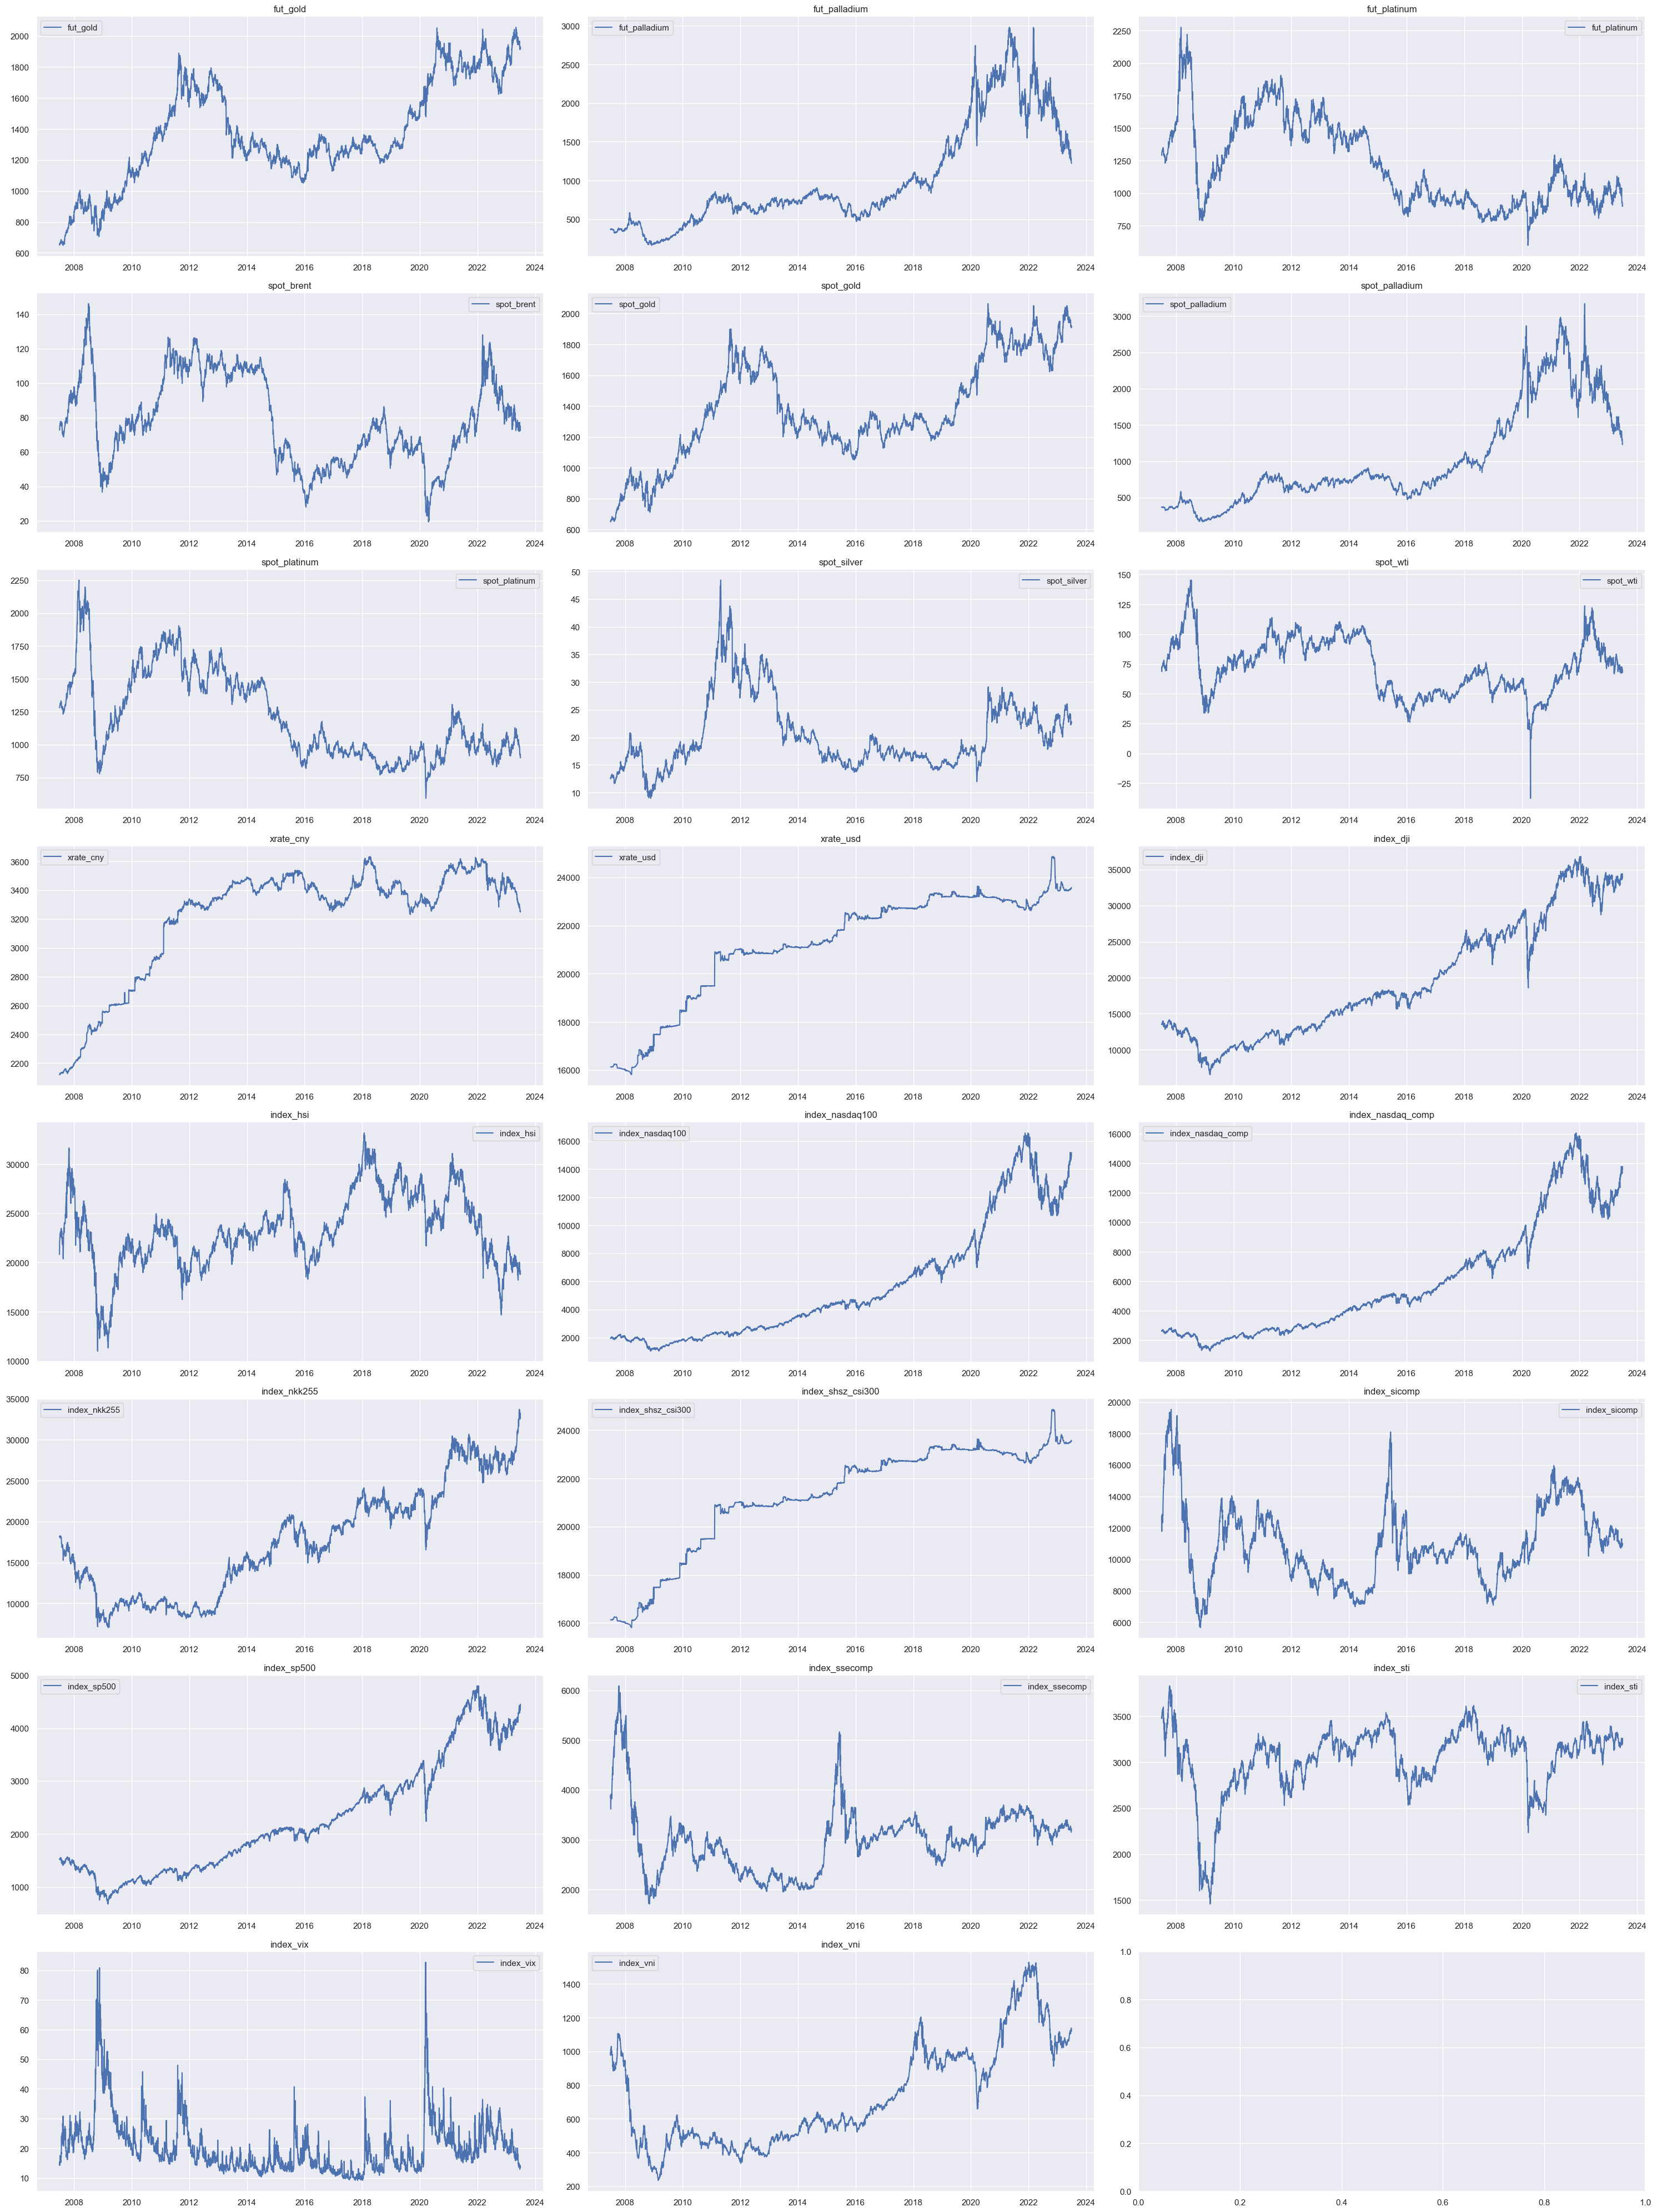

In [21]:
# Prepare the plots
num_cols = len(data.columns)
num_cols_per_row = 3

# Calculate number of rows needed for the plot
num_rows = (num_cols - 1) // num_cols_per_row + 1

# create the subplots
fig, ax = plt.subplots(num_rows, num_cols_per_row, figsize = (30,5 * num_rows))

# Flatten the axs array to make it easier to iterate
ax = ax.flatten()

# Iterate through columns and plot the line graphs
for i, column in enumerate(data.columns):
    ax[i].plot(data[column], label = column)
    ax[i].set_title(column)
    ax[i].legend()
    
# Avoid overlapping layout
plt.tight_layout()

# Show the plot
plt.show()

<Axes: >

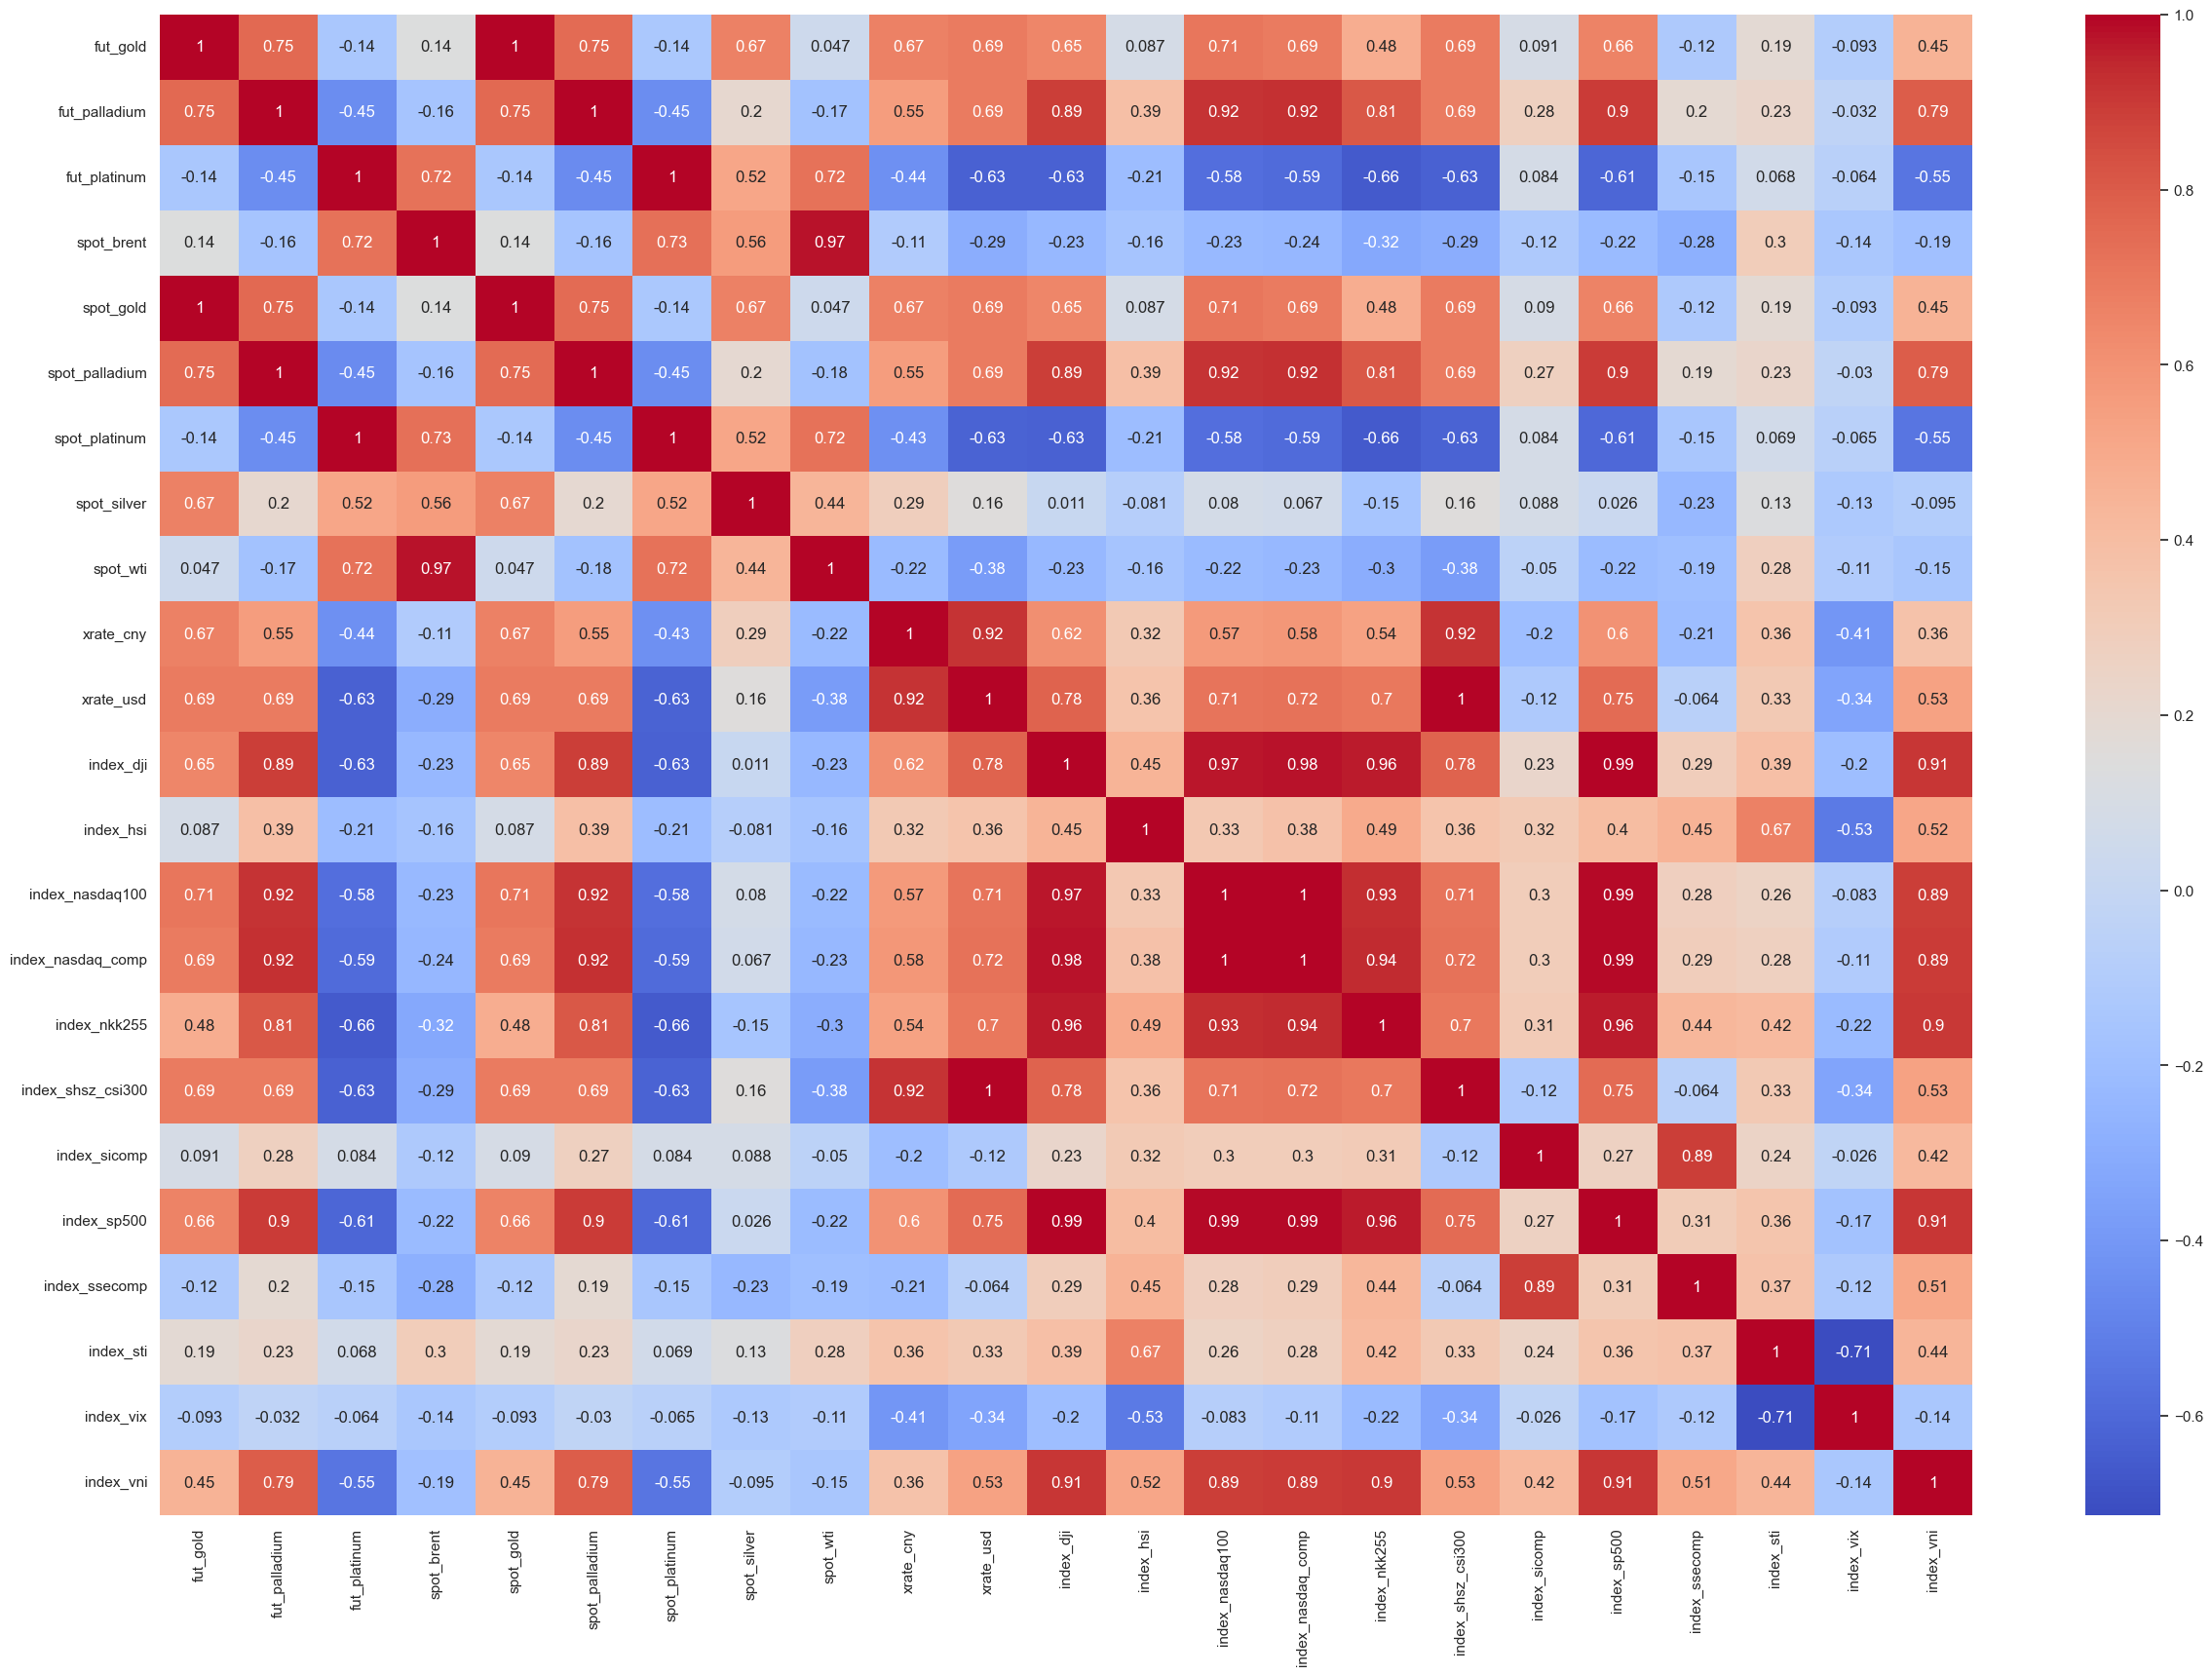

In [22]:
# Use heat map to check for correlation between features
import seaborn as sns

# Generate a big enough plot
plt.subplots(figsize = (30,20))

# creating a colormap
colormap = sns.color_palette('coolwarm', as_cmap = True)

# Plot the map
sns.heatmap(data.corr(), annot = True, cmap = colormap)

In [23]:
# Finding most correlated with target variable
data.corr()['index_vni'].sort_values(ascending = False)

index_vni            1.000000
index_sp500          0.908658
index_dji            0.908527
index_nkk255         0.904002
index_nasdaq_comp    0.894893
index_nasdaq100      0.887322
fut_palladium        0.793986
spot_palladium       0.793573
index_shsz_csi300    0.534982
xrate_usd            0.534982
index_hsi            0.515360
index_ssecomp        0.505078
spot_gold            0.453587
fut_gold             0.453574
index_sti            0.439578
index_sicomp         0.423965
xrate_cny            0.364960
spot_silver         -0.094937
index_vix           -0.139706
spot_wti            -0.148564
spot_brent          -0.189930
spot_platinum       -0.548029
fut_platinum        -0.548847
Name: index_vni, dtype: float64

We will perform a version with full variables and also highly-correlated versions only.

We can see from the chart:
- The price of future commodities are `prefectly correlated` with the spot price, therefore we can eliminate future prices of commodities to avoid multicolinearity issues
- `Palladium` has a certain degree of `positive correlation` with our target variable (the VN-Index), while platinum has a certain degree of negatively correlation
- `Asian markets' indices` show `low correlation` with the target variable (approximately +- 50%)
- `Exchange rate` seems to not highly correlated.
- The `US's stock markets' indices` are `highly correlated` with our target variables (0.89 - 0.91), this can be a good variables to input into our model.

We will keep only features SP500, SHSZ_CSI30, Exchange rate USD, 
- Representative for different global stock indices and commodity prices (US, Asian, Commodity price)
- Have high correlation with VN-Index
- Drop colinearity features to avoid adundant information

In [24]:
# Keep only high correlated and representative data
data = data[['index_sp500','spot_palladium','index_shsz_csi300','index_vni']]

<Axes: >

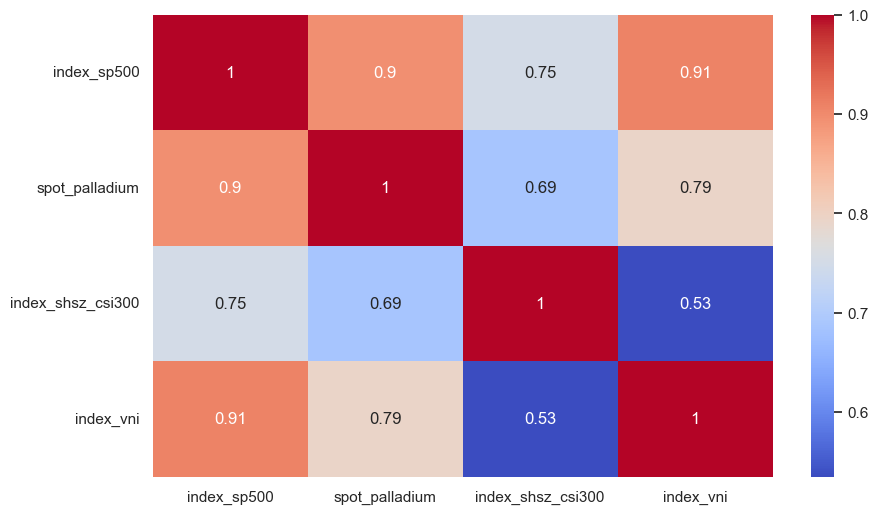

In [25]:
# Test correlation again
plt.subplots(figsize = (10,6))

# creating a colormap
colormap = sns.color_palette('coolwarm', as_cmap = True)

# Plot the map
sns.heatmap(data.corr(), annot = True, cmap = colormap)

# Cointegration test

## Check for stationarity
We will check for stationarity of time series.

In [26]:
# Check for stationarity
import statsmodels.tsa.stattools as ts
for col in data.columns:
    result = ts.adfuller(data[col])
    p_value = result[1]
    print(f"{col}: \n Test statistics: {result[0]} \n p_value: {result[1]} \n Critical values: {result[4]} ")
    

index_sp500: 
 Test statistics: 0.3806979178619457 
 p_value: 0.9807585854447095 
 Critical values: {'1%': -3.431921028770973, '5%': -2.8622341942076295, '10%': -2.5671395256734146} 
spot_palladium: 
 Test statistics: -1.472588714341576 
 p_value: 0.5470251211828071 
 Critical values: {'1%': -3.4319286138291263, '5%': -2.862237544946232, '10%': -2.567141309453307} 
index_shsz_csi300: 
 Test statistics: -2.318197782655656 
 p_value: 0.16616597577236236 
 Critical values: {'1%': -3.431921406292311, '5%': -2.8622343609798317, '10%': -2.5671396144552685} 
index_vni: 
 Test statistics: -1.1801398182319143 
 p_value: 0.6820801879038988 
 Critical values: {'1%': -3.431921028770973, '5%': -2.8622341942076295, '10%': -2.5671395256734146} 


### Cointegration test
Determine whether we can detect a long-run relationship between time-series variables

In [30]:
# Cointegration test
import statsmodels.tsa.stattools as ts

cols = []
p_values = []
test_stats = []
crit_values = []

for column in data.drop('index_vni', axis = 1).columns:
    result = ts.coint(data['index_vni'], data[column], method = 'aeg', maxlag = 5)
    cols.append(column)
    p_values.append(result[1])
    test_stats.append(result[0])
    crit_values.append(result[2])

Coint = {'Test stats' : test_stats, 'p_values' : p_values, 'Critical Values': crit_values}
Coint = pd.DataFrame(Coint)
Coint.index = cols
Coint['Cointegration'] = np.where(Coint['p_values'] < 0.1, 'Cointegrated','No cointegration')
Coint



,Test stats,p_values,Critical Values,Cointegration
index_sp500,-3.842851,0.011873,"[-3.8990657624204785, -3.337594239253241, -3.0...",Cointegrated
spot_palladium,-3.076948,0.093027,"[-3.8990657624204785, -3.337594239253241, -3.0...",Cointegrated
index_shsz_csi300,-2.416205,0.317219,"[-3.8990657624204785, -3.337594239253241, -3.0...",No cointegration


### Granger Causality test

The Granger causality test is conducted to determine whether one time series is useful in forecasting another. A time series X is said to Granger-cause Y if it can be shown, usually through a series of t-tests and F-tests on lagged values of X (and with lagged values of Y also included), that those X values provide statistically significant information about future values of Y.

In this project we are focusing in predicting the VN-index, therefore we will test all variables on its predictability on VN-index

In [30]:
# Import test
from statsmodels.tsa.stattools import grangercausalitytests

# Define parameters
maxlag = 12
test = 'ssr_chi2test'

# Define test
def granger_causality_matrix(X_train, variables, test = test, verbose = False):
    dataset = pd.DataFrame(np.zeros((len(variables), len(variables))), columns = variables, index = variables)
    for c in dataset.columns:
        for r in dataset.index:
            test_result = grangercausalitytests(X_train[[r,c]], maxlag= maxlag, verbose= False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            
            min_p_value = np.min(p_values)
            dataset.loc[r,c] = min_p_value
    dataset.columns = [var + '_x' for var in variables]
    
    dataset.index = [var + '_y' for var in variables]
    
    return dataset

In [31]:
granger_result = granger_causality_matrix(data, variables= data.columns)
granger_result

,index_sp500_x,spot_palladium_x,index_shsz_csi300_x,index_vni_x
index_sp500_y,1.0000,0.1347,0.0158,0.0004
spot_palladium_y,0.0000,1.0000,0.0015,0.0056
index_shsz_csi300_y,0.0086,0.0403,1.0000,0.0546
index_vni_y,0.0000,0.0000,0.0012,1.0000


In [32]:
# Examine potential variables to predict vn-index
granger_result.loc['index_vni_y'].T.sort_values(ascending = True)

index_sp500_x          0.0000
spot_palladium_x       0.0000
index_shsz_csi300_x    0.0012
index_vni_x            1.0000
Name: index_vni_y, dtype: float64

In [35]:
# Save the DataFrame to a CSV file in the same folder
csv_file_path = 'data.csv'
data.to_csv(csv_file_path)